## HOUSING: PRICE PREDICTION

#### Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:
    • Which variables are important to predict the price of variable?
    • How do these variables describe the price of the house?

In [1]:
# Importing Laibraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset
df_train = pd.read_excel(r'C:\Users\DELL\Desktop\internship projects\hpp_train.xlsx')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [3]:
df_test = pd.read_excel(r'C:\Users\DELL\Desktop\internship projects\hpp_test.xlsx')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [4]:
#To show all columns
pd.set_option("display.max_columns",None)

In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


## Exploratory Data Analysis (EDA)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [649]:
print("Training data : ", df_train.shape)
print("Test data     : ", df_test.shape)

Training data :  (1168, 81)
Test data     :  (292, 80)


In [650]:
# checking categorcial columns
df_train.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [651]:
# checking numeric columns
df_train._get_numeric_data().columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [652]:
data_desc = open(r'C:\Users\DELL\Desktop\internship projects\data_desc.txt')
print(data_desc.read())
data_desc.close()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [653]:
#Handle Categorical missing values
for i in ('MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    print(df_train[i].value_counts()[df_train[i].value_counts() == df_train[i].value_counts().max()],'\n')
    print('********************')

None    696
Name: MasVnrType, dtype: int64 

********************
TA    517
Name: BsmtQual, dtype: int64 

********************
TA    1041
Name: BsmtCond, dtype: int64 

********************
No    756
Name: BsmtExposure, dtype: int64 

********************
Unf    345
Name: BsmtFinType1, dtype: int64 

********************
Unf    1002
Name: BsmtFinType2, dtype: int64 

********************
SBrkr    1070
Name: Electrical, dtype: int64 

********************
Gd    301
Name: FireplaceQu, dtype: int64 

********************
Attchd    691
Name: GarageType, dtype: int64 

********************
Unf    487
Name: GarageFinish, dtype: int64 

********************
TA    1050
Name: GarageQual, dtype: int64 

********************
TA    1061
Name: GarageCond, dtype: int64 

********************


In [654]:
df_train['MasVnrType'] = df_train['MasVnrType'].fillna('None')
df_train['BsmtQual'] = df_train['BsmtQual'].fillna('TA')
df_train['BsmtCond'] = df_train['BsmtCond'].fillna('TA')
df_train['BsmtExposure'] = df_train['BsmtExposure'].fillna('No')
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].fillna('Unf')
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].fillna('Unf')
df_train['Electrical'] = df_train['Electrical'].fillna('SBrkr')
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna('Gd')
df_train['GarageType'] = df_train['GarageType'].fillna('Attchd')
df_train['GarageFinish'] = df_train['GarageFinish'].fillna('Unf')
df_train['GarageQual'] = df_train['GarageQual'].fillna('TA')
df_train['GarageCond'] = df_train['GarageCond'].fillna('TA')

In [655]:
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean())
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mean())
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(int(0))

In [656]:
df_train.drop(columns='Id', inplace=True)
df_train.drop(columns='Alley', inplace=True)
df_train.drop(columns='PoolQC',inplace=True)
df_train.drop(columns='Fence', inplace=True)
df_train.drop(columns='MiscFeature', inplace=True)

In [657]:
df_train.shape

(1168, 76)

In [658]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   Utilities      1168 non-null   object 
 8   LotConfig      1168 non-null   object 
 9   LandSlope      1168 non-null   object 
 10  Neighborhood   1168 non-null   object 
 11  Condition1     1168 non-null   object 
 12  Condition2     1168 non-null   object 
 13  BldgType       1168 non-null   object 
 14  HouseStyle     1168 non-null   object 
 15  OverallQual    1168 non-null   int64  
 16  OverallCond    1168 non-null   int64  
 17  YearBuilt      1168 non-null   int64  
 18  YearRemo

## Visualization

In [659]:
# checking categorcial columns
object_cols = df_train.select_dtypes(include=['object']).columns

In [660]:
len (object_cols)

39

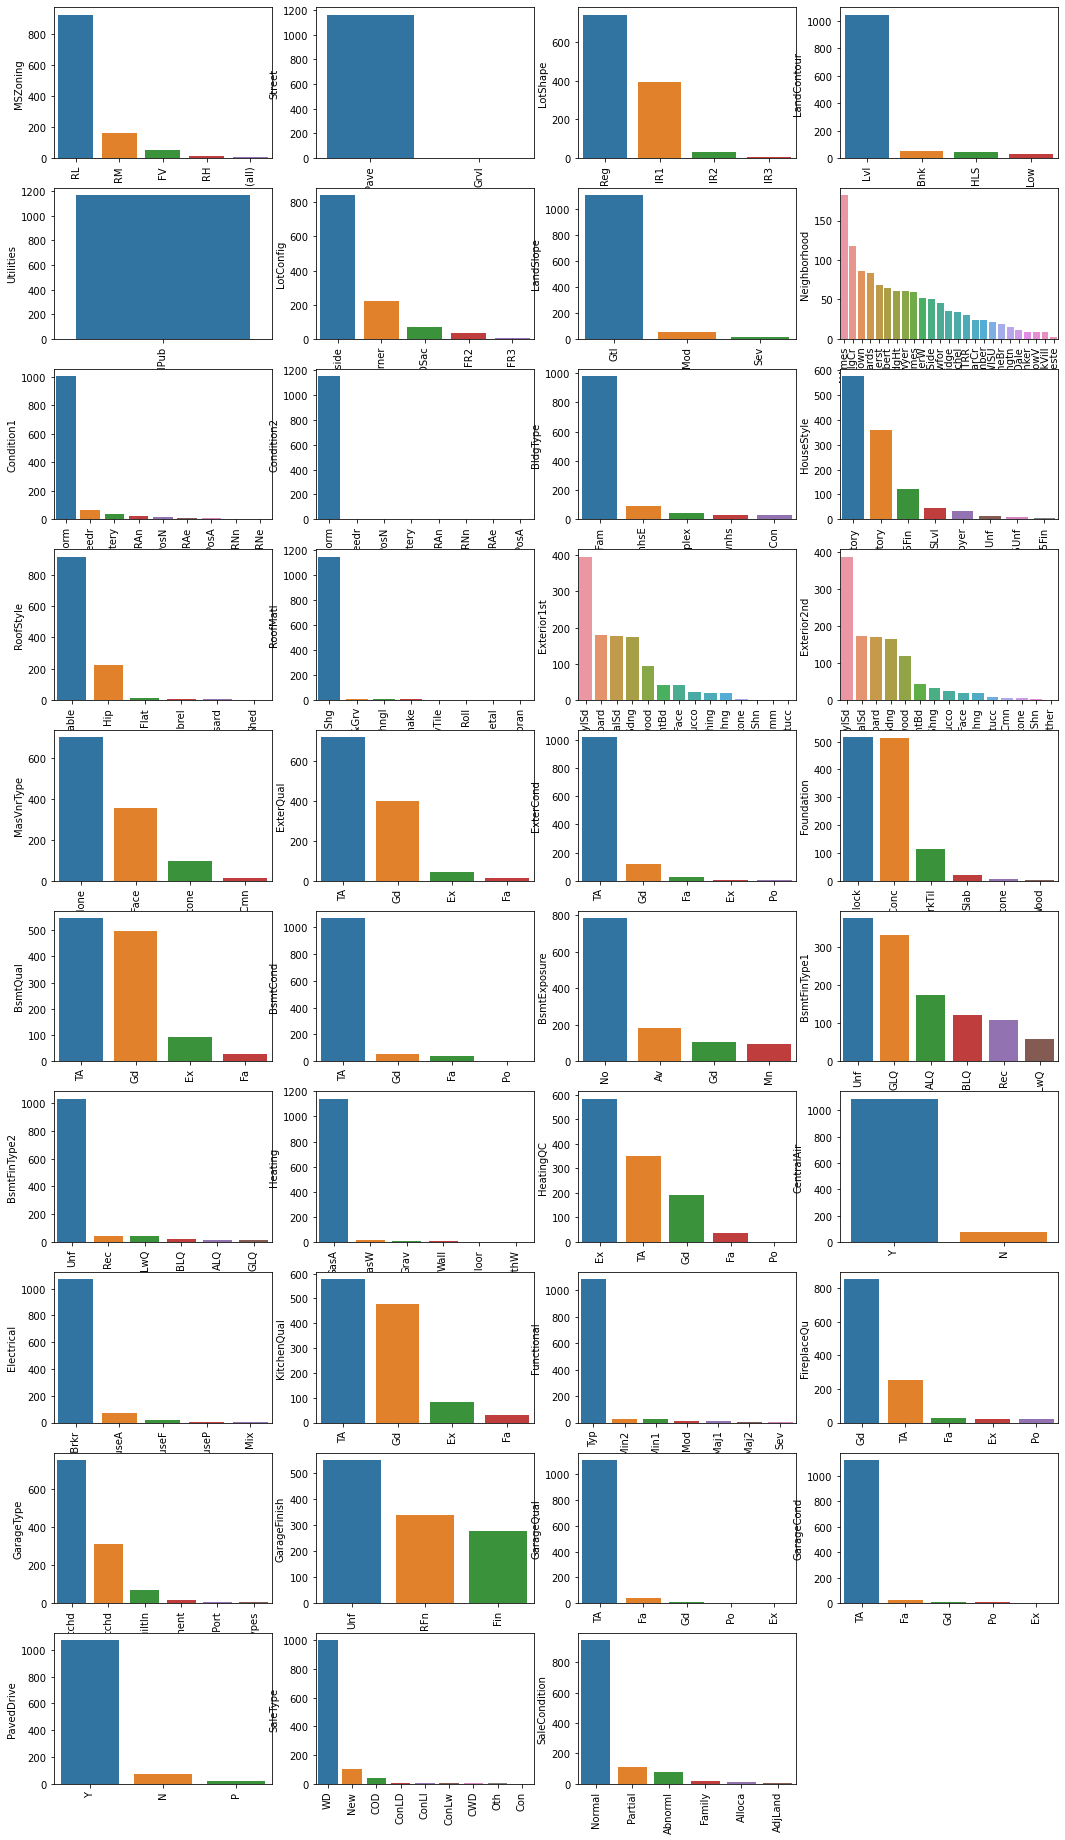

In [661]:
plt.figure(figsize=(18,36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
for col in object_cols:
    y = df_train[col].value_counts()
    plt.subplot(11,4,index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index +=1

In [662]:
# checking numeric columns
num_var = df_train._get_numeric_data().columns

In [663]:
num_var

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [664]:
len(num_var)

37

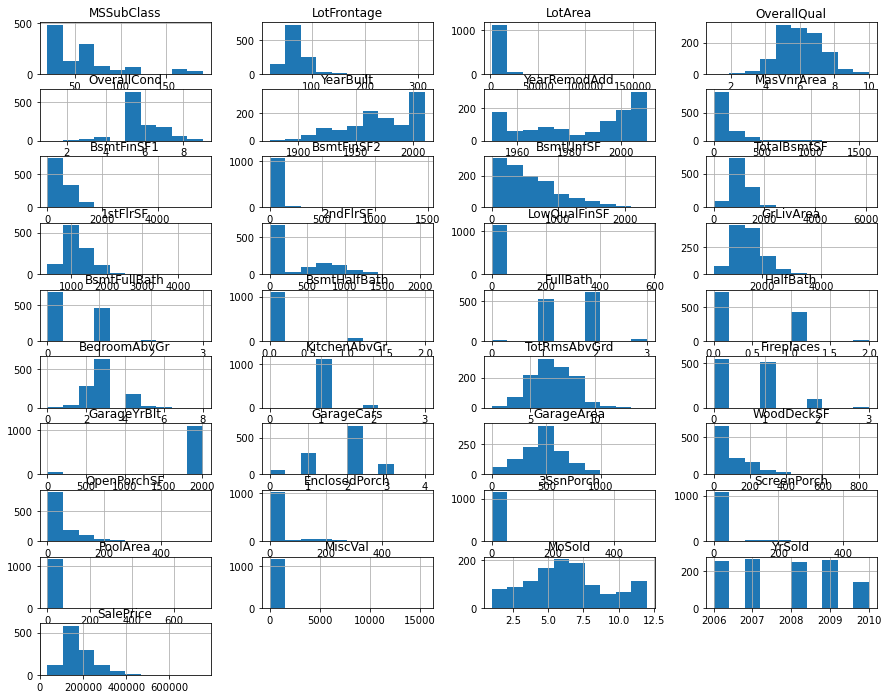

In [665]:
# Visualization For numerical data
df_train.hist(figsize=(15,12), layout=(10,4), sharex=False);

In [666]:
# Data Processing
from sklearn.preprocessing import OneHotEncoder
s = (df_train.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',len(object_cols))

Categorical variables:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
No. of. categorical features:  39


In [667]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,70.98847,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,0,2,2007,WD,Normal,128000
1,20,RL,95.00000,15865,Pave,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,0,10,2007,WD,Normal,268000
2,60,RL,92.00000,9920,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,0,6,2007,WD,Normal,269790
3,20,RL,105.00000,11751,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,0,1,2010,COD,Normal,190000
4,20,RL,70.98847,16635,Pave,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,RL,70.98847,9819,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,BrkFace,31.0,TA,Gd,CBlock,TA,TA,No,BLQ,450,Unf,0,432,882,GasA,TA,Y,SBrkr,900,0,0,900,0,0,1,0,3,1,TA,5,Typ,0,Gd,Detchd,1970.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,0,2,2010,WD,Normal,122000
1164,20,RL,67.00000,8777,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,4,5,1949,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,0,0,GasA,Ex,Y,SBrkr,1126,0,0,1126,0,0,2,0,2,1,Gd,5,Typ,0,Gd,Detchd,2002.0,Fin,2,520,TA,TA,N,0,96,0,0,0,0,0,5,2009,WD,Normal,108000
1165,160,RL,24.00000,2280,Pave,Reg,Lvl,AllPub,FR2,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,6,1976,1976,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,566,Unf,0,289,855,GasA,TA,Y,SBrkr,855,601,0,1456,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1976.0,Unf,2,440,TA,TA,Y,87,0,0,0,0,0,0,7,2009,WD,Normal,148500
1166,70,C (all),50.00000,8500,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,GasA,TA,N,SBrkr,649,668,0,1317,0,0,1,0,3,1,TA,6,Typ,0,Gd,Detchd,1920.0,Unf,1,250,TA,Fa,N,0,54,172,0,0,0,0,7,2008,WD,Normal,40000


In [668]:
df_train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 76, dtype: object

In [669]:
# Checking corelation
df_train.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.336681,-0.124151,0.070462,-0.056978,0.023988,0.056618,0.027813,-0.052236,-0.062403,-0.134170,-0.214042,-0.227927,0.300366,0.053737,0.086448,0.004556,0.008207,0.140807,0.168423,-0.013283,0.283506,0.051179,-0.035792,-0.085403,-0.027639,-0.092408,-0.022609,0.017468,-0.004252,-0.043210,-0.013291,0.009583,-0.023503,-0.016015,-0.038595,-0.060775
LotFrontage,-0.336681,1.000000,0.299452,0.229218,-0.047573,0.112655,0.088799,0.188758,0.228996,0.002159,0.113924,0.356107,0.403436,0.089675,0.007506,0.374251,0.094046,0.001389,0.171773,0.047816,0.237199,-0.002729,0.318771,0.230610,0.106911,0.260252,0.322644,0.088334,0.151328,0.020902,0.051084,0.030405,0.196001,-0.001329,0.022517,-0.003885,0.323779
LotArea,-0.124151,0.299452,1.000000,0.107188,0.017513,0.005506,0.027228,0.121086,0.221851,0.056656,0.006600,0.259733,0.312843,0.059803,-0.001915,0.281360,0.142387,0.059282,0.123197,0.007271,0.117351,-0.013075,0.184546,0.285983,0.078849,0.158313,0.195162,0.216720,0.093080,-0.007446,0.025794,0.025256,0.097107,0.051679,0.015141,-0.035399,0.249499
OverallQual,0.070462,0.229218,0.107188,1.000000,-0.083167,0.575800,0.555945,0.407230,0.219643,-0.040893,0.308676,0.528285,0.458758,0.316624,-0.039295,0.599700,0.101732,-0.030702,0.548824,0.296134,0.099639,-0.178220,0.432579,0.390067,0.294234,0.596322,0.566782,0.227137,0.341030,-0.098374,0.045919,0.059387,0.072247,-0.025786,0.090638,-0.048759,0.789185
OverallCond,-0.056978,-0.047573,0.017513,-0.083167,1.000000,-0.377731,0.080669,-0.137475,-0.028810,0.044336,-0.146384,-0.162481,-0.134420,0.036668,0.041877,-0.065006,-0.039680,0.091016,-0.171931,-0.052125,0.028393,-0.076047,-0.039952,-0.013632,0.027716,-0.161996,-0.126021,0.012290,-0.024899,0.056074,0.040476,0.069463,-0.003603,0.075178,0.005519,0.055517,-0.065642
YearBuilt,0.023988,0.112655,0.005506,0.575800,-0.377731,1.000000,0.592829,0.321905,0.227933,-0.027682,0.155559,0.386265,0.279450,0.011834,-0.189044,0.198644,0.164983,-0.028161,0.471264,0.243227,-0.080639,-0.167869,0.095476,0.134313,0.261663,0.525346,0.473216,0.204830,0.191069,-0.373544,0.037079,-0.058760,0.006408,-0.030008,0.031754,-0.013976,0.514408
YearRemodAdd,0.056618,0.088799,0.027228,0.555945,0.080669,0.592829,1.000000,0.181385,0.114430,-0.044694,0.174732,0.280720,0.233384,0.155102,-0.072526,0.295048,0.104643,-0.011375,0.444446,0.194943,-0.035847,-0.139943,0.206923,0.118378,0.162015,0.428325,0.387744,0.197410,0.238755,-0.193574,0.064763,-0.046220,0.006874,-0.001199,0.024663,0.033265,0.507831
MasVnrArea,0.027813,0.188758,0.121086,0.407230,-0.137475,0.321905,0.181385,1.000000,0.265735,-0.065707,0.109562,0.365016,0.337143,0.172741,-0.070515,0.386791,0.086444,0.014196,0.267278,0.200190,0.091312,-0.037956,0.278661,0.242510,0.131193,0.342077,0.365280,0.151579,0.130885,-0.101941,0.018720,0.046498,0.013590,-0.027582,0.013363,-0.013462,0.463626
BsmtFinSF1,-0.052236,0.228996,0.221851,0.219643,-0.028810,0.227933,0.114430,0.265735,1.000000,-0.052145,-0.499861,0.518940,0.445876,-0.127656,-0.070932,0.217160,0.645126,0.063895,0.054511,0.015767,-0.114888,-0.065450,0.043499,0.257482,0.102271,0.197529,0.286290,0.192939,0.108802,-0.082351,0.025485,0.033490,0.154769,0.008314,0.007482,0.005614,0.362874
BsmtFinSF2,-0.062403,0.002159,0.056656,-0.040893,0.044336,-0.027682,-0.044694,-0.065707,-0.052145,1.000000,-0.213580,0.098167,0.093442,-0.092049,-0.000577,-0.007484,0.163518,0.093692,-0.060773,-0.023734,-0.005788,-0.034411,-0.033702,0.047945,0.049598,-0.020806,-0.002051,0.094690,-0.014103,0.032081,-0.031263,0.076561,0.045990,0.007915,-0.014605,0.038438,-0.010151


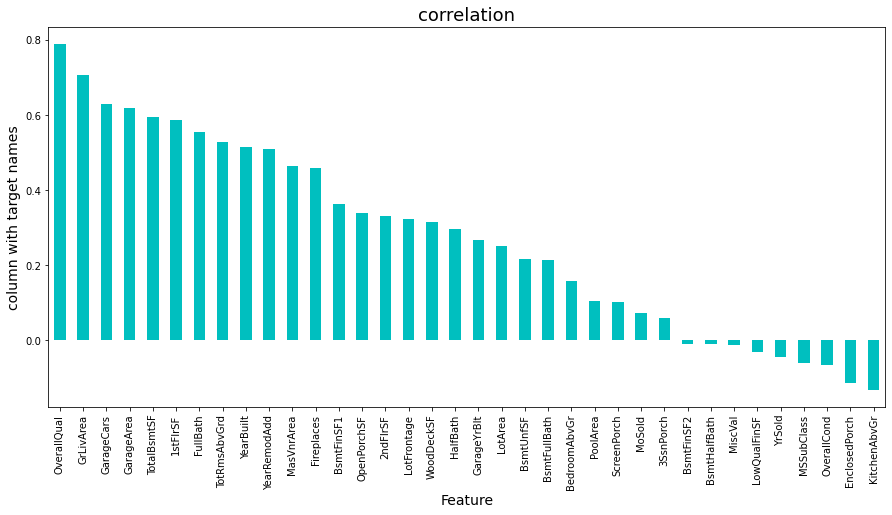

In [670]:
#checking correlation high to low 
plt.figure(figsize=(15,7))
df_train.corr()['SalePrice'].sort_values(ascending=False).drop(['SalePrice']).plot(kind='bar', color ='c')
plt.xlabel('Feature', fontsize = 14)
plt.ylabel('column with target names', fontsize=14)
plt.title('correlation', fontsize = 18)
plt.show()

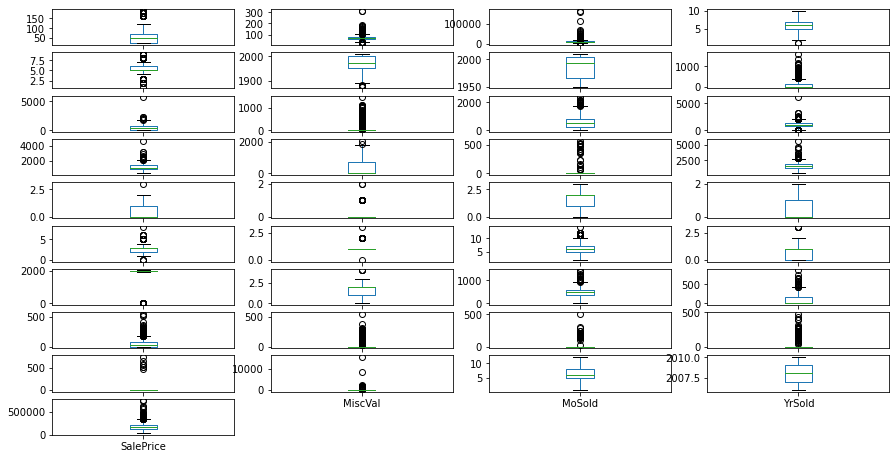

In [671]:
# Outliers Checking
df_train.plot(kind='box', subplots = True, layout=(19,4), figsize=(15,15));

In [672]:
df_train.shape

(1168, 76)

In [673]:
df_test.shape

(292, 80)

In [519]:
#df_train.drop(columns='SalePrice', inplace=True)

In [520]:
#df_train.shape

In [674]:
# combining the both datasets
combine_df = [df_train,df_test]
df = pd.concat(combine_df).reset_index(drop=True)

In [675]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Id,Alley,PoolQC,Fence,MiscFeature
0,120,RL,70.98847,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,0,2,2007,WD,Normal,128000.0,NaN,NaN,NaN,NaN,NaN
1,20,RL,95.00000,15865,Pave,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,0,10,2007,WD,Normal,268000.0,NaN,NaN,NaN,NaN,NaN
2,60,RL,92.00000,9920,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,0,6,2007,WD,Normal,269790.0,NaN,NaN,NaN,NaN,NaN
3,20,RL,105.00000,11751,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,0,1,2010,COD,Normal,190000.0,NaN,NaN,NaN,NaN,NaN
4,20,RL,70.98847,16635,Pave,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,0,6,2009,WD,Normal,215000.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,20,RL,78.00000,10206,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,468.0,TA,TA,PConc,Gd,TA,No,GLQ,33,Unf,0,1530,1563,GasA,Ex,Y,SBrkr,1563,0,0,1563,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2007.0,RFn,3,758,TA,TA,Y,144,99,0,0,0,0,0,10,2008,WD,Normal,NaN,83.0,NaN,NaN,NaN,NaN
1456,20,RL,57.00000,9245,Pave,IR2,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,686,Unf,0,304,990,GasA,Ex,Y,SBrkr,990,0,0,990,0,1,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1996.0,Unf,2,672,TA,TA,Y,0,0,0,0,0,0,0,2,2008,WD,Normal,NaN,1048.0,NaN,NaN,NaN,NaN
1457,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,700,3,2010,WD,Normal,NaN,17.0,NaN,NaN,NaN,Shed
1458,50,RM,50.00000,5000,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,6,7,1947,1950,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,Gd,CBlock

In [676]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1415 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [677]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['BsmtQual'] = df['BsmtQual'].fillna('TA')
df['BsmtCond'] = df['BsmtCond'].fillna('TA')
df['BsmtExposure'] = df['BsmtExposure'].fillna('No')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('Unf')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('Unf')
df['Electrical'] = df['Electrical'].fillna('SBrkr')
df['FireplaceQu'] = df['FireplaceQu'].fillna('Gd')
df['GarageType'] = df['GarageType'].fillna('Attchd')
df['GarageFinish'] = df['GarageFinish'].fillna('Unf')
df['GarageQual'] = df['GarageQual'].fillna('TA')
df['GarageCond'] = df['GarageCond'].fillna('TA')

In [678]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(int(0))
#df['SalePrice'] = df['SalePrice'].fillna(df['SalePrice'].mean())

In [679]:
df.drop(columns='Id', inplace=True)
df.drop(columns='Alley', inplace=True)
df.drop(columns='PoolQC',inplace=True)
df.drop(columns='Fence', inplace=True)
df.drop(columns='MiscFeature', inplace=True)
#df.drop(columns='SalePrice', inplace=True)

In [680]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [681]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,70.98847,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,0,2,2007,WD,Normal,128000.0
1,20,RL,95.00000,15865,Pave,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,0,10,2007,WD,Normal,268000.0
2,60,RL,92.00000,9920,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,0,6,2007,WD,Normal,269790.0
3,20,RL,105.00000,11751,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,0,1,2010,COD,Normal,190000.0
4,20,RL,70.98847,16635,Pave,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,0,6,2009,WD,Normal,215000.0


In [683]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',len(object_cols))

Categorical variables:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
No. of. categorical features:  39


In [685]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[object_cols]))
OH_cols.index = df.index
OH_cols.columns = OH_encoder.get_feature_names()
df_final = df.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

In [686]:
df_final

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,x0_C (all),x0_FV,x0_RH,x0_RL,x0_RM,x1_Grvl,x1_Pave,x2_IR1,x2_IR2,x2_IR3,x2_Reg,x3_Bnk,x3_HLS,x3_Low,x3_Lvl,x4_AllPub,x4_NoSeWa,x5_Corner,x5_CulDSac,x5_FR2,x5_FR3,x5_Inside,x6_Gtl,x6_Mod,x6_Sev,x7_Blmngtn,x7_Blueste,x7_BrDale,x7_BrkSide,x7_ClearCr,x7_CollgCr,x7_Crawfor,x7_Edwards,x7_Gilbert,x7_IDOTRR,x7_MeadowV,x7_Mitchel,x7_NAmes,x7_NPkVill,x7_NWAmes,x7_NoRidge,x7_NridgHt,x7_OldTown,x7_SWISU,x7_Sawyer,x7_SawyerW,x7_Somerst,x7_StoneBr,x7_Timber,x7_Veenker,x8_Artery,x8_Feedr,x8_Norm,x8_PosA,x8_PosN,x8_RRAe,x8_RRAn,x8_RRNe,x8_RRNn,x9_Artery,x9_Feedr,x9_Norm,x9_PosA,x9_PosN,x9_RRAe,x9_RRAn,x9_RRNn,x10_1Fam,x10_2fmCon,x10_Duplex,x10_Twnhs,x10_TwnhsE,x11_1.5Fin,x11_1.5Unf,x11_1Story,x11_2.5Fin,x11_2.5Unf,x11_2Story,x11_SFoyer,x11_SLvl,x12_Flat,x12_Gable,x12_Gambrel,x12_Hip,x12_Mansard,x12_Shed,x13_ClyTile,x13_CompShg,x13_Membran,x13_Metal,x13_Roll,x13_Tar&Grv,x13_WdShake,x13_WdShngl,x14_AsbShng,x14_AsphShn,x14_BrkComm,x14_BrkFace,x14_CBlock,x14_CemntBd,x14_HdBoard,x14_ImStucc,x14_MetalSd,x14_Plywood,x14_Stone,x14_Stucco,x14_VinylSd,x14_Wd Sdng,x14_WdShing,x15_AsbShng,x15_AsphShn,x15_Brk Cmn,x15_BrkFace,x15_CBlock,x15_CmentBd,x15_HdBoard,x15_ImStucc,x15_MetalSd,x15_Other,x15_Plywood,x15_Stone,x15_Stucco,x15_VinylSd,x15_Wd Sdng,x15_Wd Shng,x16_BrkCmn,x16_BrkFace,x16_None,x16_Stone,x17_Ex,x17_Fa,x17_Gd,x17_TA,x18_Ex,x18_Fa,x18_Gd,x18_Po,x18_TA,x19_BrkTil,x19_CBlock,x19_PConc,x19_Slab,x19_Stone,x19_Wood,x20_Ex,x20_Fa,x20_Gd,x20_TA,x21_Fa,x21_Gd,x21_Po,x21_TA,x22_Av,x22_Gd,x22_Mn,x22_No,x23_ALQ,x23_BLQ,x23_GLQ,x23_LwQ,x23_Rec,x23_Unf,x24_ALQ,x24_BLQ,x24_GLQ,x24_LwQ,x24_Rec,x24_Unf,x25_Floor,x25_GasA,x25_GasW,x25_Grav,x25_OthW,x25_Wall,x26_Ex,x26_Fa,x26_Gd,x26_Po,x26_TA,x27_N,x27_Y,x28_FuseA,x28_FuseF,x28_FuseP,x28_Mix,x28_SBrkr,x29_Ex,x29_Fa,x29_Gd,x29_TA,x30_Maj1,x30_Maj2,x30_Min1,x30_Min2,x30_Mod,x30_Sev,x30_Typ,x31_Ex,x31_Fa,x31_Gd,x31_Po,x31_TA,x32_2Types,x32_Attchd,x32_Basment,x32_BuiltIn,x32_CarPort,x32_Detchd,x33_Fin,x33_RFn,x33_Unf,x34_Ex,x34_Fa,x34_Gd,x34_Po,x34_TA,x35_Ex,x35_Fa,x35_Gd,x35_Po,x35_TA,x36_N,x36_P,x36_Y,x37_COD,x37_CWD,x37_Con,x37_ConLD,x37_ConLI,x37_ConLw,x37_New,x37_Oth,x37_WD,x38_Abnorml,x38_AdjLand,x38_Alloca,x38_Family,x38_Normal,x38_Partial
0,120,70.988470,4928,6,5,1976,1976,0.0,120,0,958,1078,958,0,0,958,0,0,2,0,2,1,5,1,1977.0,2,440,0,205,0,0,0,0,0,2,2007,128000.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,95.000000,15865,8,6,1970,1970,0.0,351,823,1043,2217,2217,0,0,2217,1,0,2,0,4,1,8,1,1970.0,2,621,81,207,0,0,224,0,0,10,2007,268000.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [694]:
# Check that the shapes are consistent

print('df shape:', df_final.shape)
print('df_train shape:', df_train.shape)
print('df_test shape:',  df_test.shape)

df shape: (1460, 276)
df_train shape: (1168, 76)
df_test shape: (292, 80)


In [698]:
X_Train = pd.DataFrame(df_final[:1168])
X_Test  = pd.DataFrame(df_final[1168:])
Y_Train = df_train['SalePrice']

In [699]:
print('\nCheck that the datasets are consistent:\n')
print('X_train shape', X_Train.shape)
print('Y_train shape:', Y_Train.shape)
print('X_test shape:',  X_Test.shape)


Check that the datasets are consistent:

X_train shape (1168, 276)
Y_train shape: (1168,)
X_test shape: (292, 276)


In [700]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Split the training set into training and validation set

X_train, X_valid, Y_train, Y_valid = train_test_split(X_Train, Y_Train, train_size=0.8, test_size=0.2,random_state=0)

### Model Building

In [701]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor()
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)
print(mean_absolute_error(Y_valid, Y_pred))

1098.6392307692306


In [702]:
from sklearn.ensemble import GradientBoostingRegressor

model_GBR = GradientBoostingRegressor()
model_GBR.fit(X_train, Y_train)
Y_pred = model_GBR.predict(X_valid)
print(mean_absolute_error(Y_valid, Y_pred))

1463.5248838960626


In [703]:
from sklearn.linear_model import SGDRegressor

model_SGD = SGDRegressor()
model_SGD.fit(X_train, Y_train)
Y_pred = model_SGD.predict(X_valid)
print(mean_absolute_error(Y_valid, Y_pred))

7.100877135973322e+18


In [709]:
!pip install xgboost

In [710]:
from xgboost import XGBRegressor

model_XGBR = XGBRegressor(learning_rate=0.03,n_estimators=200,objective='reg:squarederror')
model_XGBR.fit(X_train,Y_train)
Y_pred = model_XGBR.predict(X_valid)
print(mean_absolute_error(Y_valid, Y_pred))

1470.8709101228633


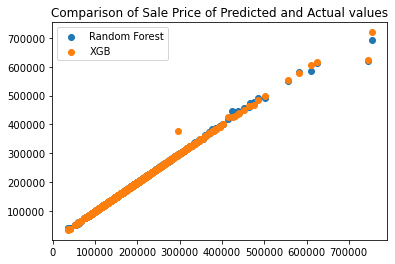

In [712]:
plt.figure()
plt.title('Comparison of Sale Price of Predicted and Actual values')
plt.scatter(Y_Train,model_RFR.predict(X_Train),label='Random Forest')
plt.scatter(Y_Train,model_XGBR.predict(X_Train),label='XGB')
plt.legend()

In [714]:
from sklearn.model_selection import GridSearchCV
model = XGBRegressor()

n_estimators   = [100, 200, 500]
learning_rates = [0.03,0.1,0.3]
objectives     = ['reg:squarederror']

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators' : n_estimators,
    'learning_rate':learning_rates,
    'objective' : objectives
    }

grid_cv = GridSearchCV(estimator = model,
            param_grid = hyperparameter_grid,
            scoring = 'neg_mean_absolute_error',
            return_train_score = True)

grid_cv.fit(X_Train,Y_Train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_o...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None,

In [715]:
grid_cv.best_score_

-773.6891138124289

In [716]:
grid_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.03, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [719]:
regressor = grid_cv.best_estimator_
Y_pred = regressor.predict(X_valid)
print(mean_absolute_error(Y_valid, Y_pred))

29.142628205128204


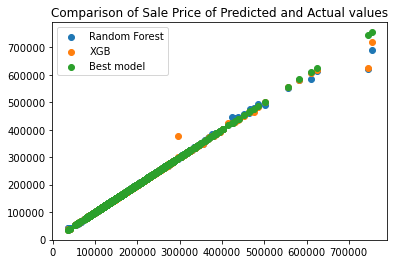

In [720]:
plt.figure()
plt.title('Comparison of Sale Price of Predicted and Actual values')
plt.scatter(Y_Train,model_RFR.predict(X_Train),label='Random Forest')
plt.scatter(Y_Train,model_XGBR.predict(X_Train),label='XGB')
plt.scatter(Y_Train,regressor.predict(X_Train),label='Best model')
plt.legend()

In [721]:
Y_Pred = regressor.predict(X_Test)

In [722]:
Y_Pred

array([35402.996, 35400.11 , 35521.28 , 35518.156, 35518.33 , 35338.06 ,
       35394.07 , 35394.496, 35394.984, 35354.66 , 35508.547, 35408.043,
       35521.848, 35387.848, 35537.812, 35504.61 , 35401.01 , 35390.434,
       35394.72 , 35406.727, 35398.113, 35528.516, 35383.004, 35546.605,
       35504.277, 35225.004, 35535.332, 35376.09 , 35360.383, 35498.72 ,
       35512.605, 35396.88 , 35354.258, 35409.797, 35515.023, 35348.344,
       35382.164, 35515.69 , 35235.664, 35543.2  , 35513.156, 35423.504,
       35353.953, 35181.51 , 35525.656, 35223.64 , 35514.027, 35512.004,
       35420.79 , 35431.324, 35382.71 , 35400.94 , 35515.55 , 35519.625,
       35547.543, 35389.02 , 35513.85 , 35506.105, 35508.746, 35528.812,
       35195.617, 35325.73 , 35526.324, 35221.09 , 35434.344, 35506.418,
       35364.01 , 35521.887, 35403.324, 35522.227, 35421.11 , 35498.336,
       35516.18 , 35414.082, 35223.1  , 35554.492, 35410.824, 35550.664,
       35410.94 , 35405.566, 35347.246, 35509.344, 

In [723]:
Y_Pred.shape

(292,)

In [725]:
sub = pd.DataFrame()
sub['Id'] = df_test['Id']
sub['SalePrice'] = Y_Pred

In [726]:
sub.head()

,Id,SalePrice
0,337,35402.996094
1,1018,35400.109375
2,929,35521.281250
3,1148,35518.156250
4,1227,35518.328125


In [727]:
sub.to_csv('Submission.csv')